In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('../csvki/VLagun_Phys_Years3.csv')

In [3]:
dataset.describe

<bound method NDFrame.describe of           PSU     O2  temp.      SS     DOC     TPOC  Windspeedinsitu  Depth  \
0    3.757624   9.46   18.3   52.00  7.5000   8.5650              3.5    3.3   
1    3.504707   9.89   19.1   50.00  7.8600   8.5200              0.0    3.6   
2    3.757624   9.66   18.1   59.00  8.1720   8.4915              1.0    3.4   
3    3.107266  10.36   19.5   46.00  7.8480   8.8320              0.0    2.9   
4    2.619498  11.56   19.0   42.00  7.5360   9.2400              0.0    3.0   
..        ...    ...    ...     ...     ...      ...              ...    ...   
115  4.500000   9.93   16.3  117.50  7.0180  13.0645              8.5    3.2   
116  4.600000  10.02   16.2  115.00  7.0905  11.4115             10.2    3.3   
117  4.500000   9.93   16.3  113.75  7.0615  11.7595              9.5    3.4   
118  4.200000  10.30   16.0  102.50  7.1050  12.4410             10.5    3.3   
119  4.100000  10.10   16.0  120.00  7.2065  13.0500             11.5    2.2   

     

In [4]:
dataset.head(5)

,PSU,O2,temp.,SS,DOC,TPOC,Windspeedinsitu,Depth,Years
0,3.757624,9.46,18.3,52.0,7.500,8.5650,3.5,3.3,0
1,3.504707,9.89,19.1,50.0,7.860,8.5200,0.0,3.6,0
2,3.757624,9.66,18.1,59.0,8.172,8.4915,1.0,3.4,0
3,3.107266,10.36,19.5,46.0,7.848,8.8320,0.0,2.9,0
4,2.619498,11.56,19.0,42.0,7.536,9.2400,0.0,3.0,0


In [6]:
X = dataset.loc[:, ['temp.', 'Windspeedinsitu']].values
y = dataset.loc[:, 'Years'].values

In [7]:
X

array([[18.3,  3.5],
       [19.1,  0. ],
       [18.1,  1. ],
       [19.5,  0. ],
       [19. ,  0. ],
       [17.6,  5. ],
       [19.7,  1. ],
       [17.8,  4. ],
       [17.5,  4. ],
       [18.4,  3.5],
       [17.8,  4. ],
       [17.9,  4. ],
       [17.2,  2. ],
       [17.3,  2. ],
       [17. ,  4. ],
       [20.1,  5. ],
       [20.5,  3. ],
       [20. ,  7. ],
       [19.9,  4. ],
       [19.8,  2. ],
       [20.3,  1. ],
       [20. ,  2. ],
       [20.4,  4. ],
       [20. ,  2.5],
       [20. ,  3. ],
       [20. ,  4. ],
       [20.4,  4. ],
       [20.1,  5. ],
       [20.2,  5. ],
       [19.8,  4. ],
       [19.1,  3. ],
       [20.7,  0. ],
       [20.6,  0.2],
       [20.2,  0.2],
       [19.8, 10. ],
       [18.7,  0. ],
       [18.7,  4. ],
       [18.9,  3. ],
       [18.7,  2. ],
       [19.9,  0. ],
       [20.2,  0.2],
       [20.2,  1.5],
       [20.6,  0.2],
       [20.1,  3. ],
       [19.6,  2.5],
       [19.5,  3. ],
       [20. ,  2.8],
       [20.4,

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### KERNEL = rbf

In [12]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [33]:
y_pred = classifier.predict(X_train)

In [34]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

[[34  8]
 [ 9 33]]


0.7976190476190477

##### Model jest dopasowany

In [27]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[19  3]
 [ 0 14]]


0.9166666666666666

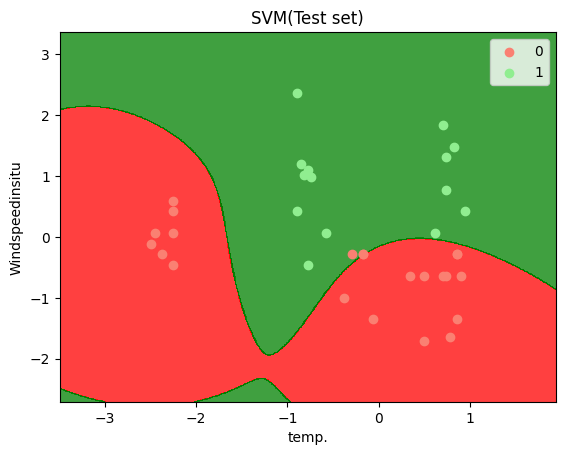

In [26]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = 
                               X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = 
                               X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('salmon', 'lightgreen'))(i), label = j)
    plt.title('SVM(Test set)')
    plt.xlabel('temp.')
    plt.ylabel('Windspeedinsitu')
    plt.legend()
    plt.show

### KERNEL = linear

In [53]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [54]:
y_pred = classifier.predict(X_train)

In [55]:
cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

[[34  8]
 [ 9 33]]


0.7976190476190477

#### Model jest dopasowany

In [56]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[20  2]
 [ 1 13]]


0.9166666666666666

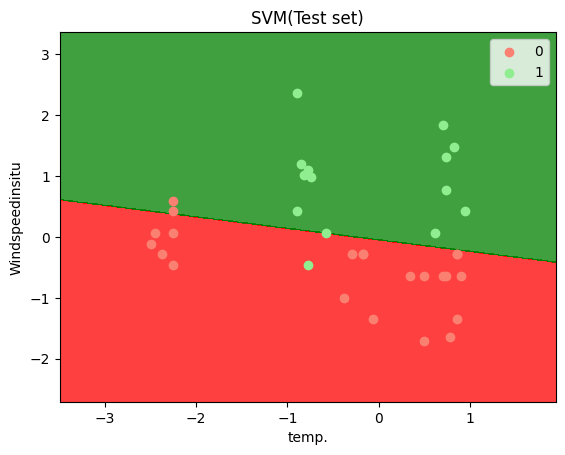

In [39]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = 
                               X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = 
                               X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('salmon', 'lightgreen'))(i), label = j)
    plt.title('SVM(Test set)')
    plt.xlabel('temp.')
    plt.ylabel('Windspeedinsitu')
    plt.legend()
    plt.show

### KERNEL = poly

In [40]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

In [41]:
y_pred = classifier.predict(X_train)

In [42]:
cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

[[22 20]
 [ 0 42]]


0.7619047619047619

#### Model jest dopasowany, ale tym razem dokładność dla zbioru testowego jest niższa, niż z użyciem pozostałych kernelów. 
##### Tutaj dokładność zgadza się z rozpiską gdzie test < train 
##### w pozostałych jest odwrotnie

In [43]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 9 13]
 [ 0 14]]


0.6388888888888888

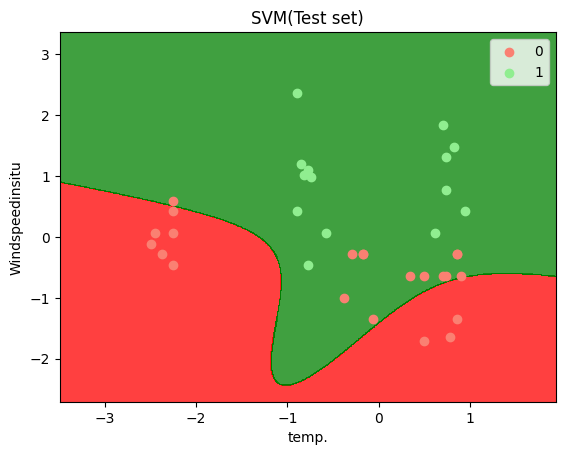

In [44]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = 
                               X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = 
                               X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('salmon', 'lightgreen'))(i), label = j)
    plt.title('SVM(Test set)')
    plt.xlabel('temp.')
    plt.ylabel('Windspeedinsitu')
    plt.legend()
    plt.show

### KERNEL = sigmoid

In [46]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=0)

In [48]:
y_pred = classifier.predict(X_train)

In [50]:
cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

[[26 16]
 [13 29]]


0.6547619047619048

#### Model jest dopasowany ale ma niższą dokładność niż z użyciem kernela linear i rbf

In [51]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15  7]
 [ 3 11]]


0.7222222222222222

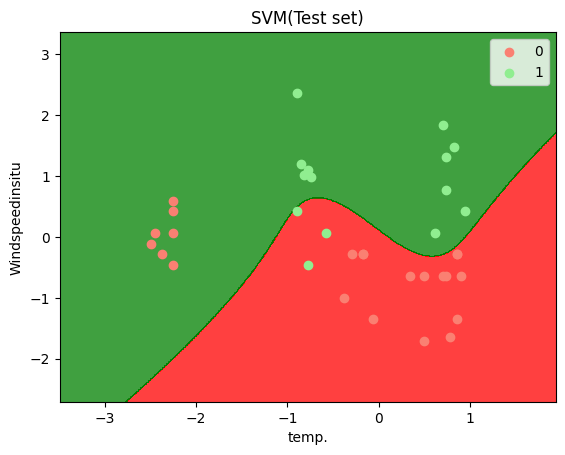

In [52]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = 
                               X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = 
                               X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('salmon', 'lightgreen'))(i), label = j)
    plt.title('SVM(Test set)')
    plt.xlabel('temp.')
    plt.ylabel('Windspeedinsitu')
    plt.legend()
    plt.show